In [182]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ajayt0m/Forecasting_Crop_Prices_Maharashtra/main/onion_daily_cleaned.csv'

onion_df = pd.read_csv(file_url)

In [183]:
#Set index as date
onion_df.index  = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [184]:
onion_df['date_arrival'] = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [185]:
onion_df

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.145833,2706.875000,2060.604167,11575.00
2021-01-02,2021-01-02,1105.066667,2720.155556,2181.844444,15560.00
2021-01-03,2021-01-03,1129.411765,2741.470588,2141.176471,3954.00
2021-01-04,2021-01-04,967.306122,2754.163265,2167.551020,21441.00
2021-01-05,2021-01-05,1188.836735,2793.714286,2275.469388,21526.00
...,...,...,...,...,...
2023-09-27,2023-09-27,948.090909,2731.454545,1978.393939,17023.00
2023-09-28,2023-09-28,1317.647059,2629.470588,2104.411765,10241.00
2023-09-29,2023-09-29,878.925926,2629.555556,1874.296296,10973.12


In [186]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2021-01-01 to 2023-10-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_arrival  1000 non-null   datetime64[ns]
 1   MIN           1004 non-null   float64       
 2   MAX           1004 non-null   float64       
 3   MODAL         1004 non-null   float64       
 4   Arrival       1004 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 47.1 KB


<AxesSubplot: xlabel='date_arrival'>

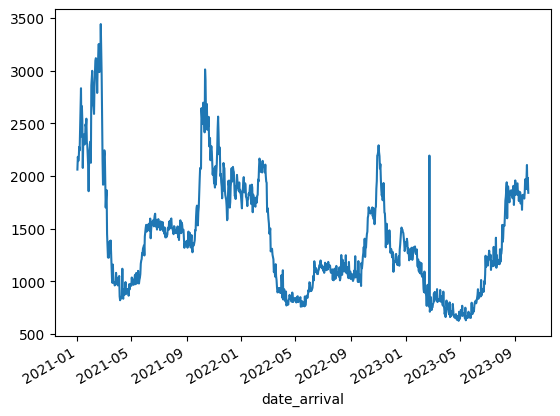

In [187]:
price = onion_df['MODAL']
price.plot()

In [188]:
import numpy as np

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [217]:
WINDOW_SIZE = 15
X1, y1 = df_to_X_y(price, WINDOW_SIZE)
X1.shape, y1.shape

((989, 15, 1), (989,))

In [218]:
X1

array([[[2060.60416667],
        [2181.84444444],
        [2141.17647059],
        ...,
        [2076.5       ],
        [2319.15789474],
        [2391.25      ]],

       [[2181.84444444],
        [2141.17647059],
        [2167.55102041],
        ...,
        [2319.15789474],
        [2391.25      ],
        [2394.59375   ]],

       [[2141.17647059],
        [2167.55102041],
        [2275.46938776],
        ...,
        [2391.25      ],
        [2394.59375   ],
        [2298.80952381]],

       ...,

       [[1738.88888889],
        [1765.25531915],
        [1811.44      ],
        ...,
        [1878.11764706],
        [1978.39393939],
        [2104.41176471]],

       [[1765.25531915],
        [1811.44      ],
        [1678.88888889],
        ...,
        [1978.39393939],
        [2104.41176471],
        [1874.2962963 ]],

       [[1811.44      ],
        [1678.88888889],
        [1819.25891304],
        ...,
        [2104.41176471],
        [1874.2962963 ],
        [1982.        ]]

In [219]:
X_train1, y_train1 = X1[:800], y1[:800]
X_val1, y_val1 = X1[800:900], y1[800:900]
X_test1, y_test1 = X1[900:], y1[900:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((800, 15, 1), (800,), (100, 15, 1), (100,), (89, 15, 1), (89,))

In [220]:
X_train1

array([[[2060.60416667],
        [2181.84444444],
        [2141.17647059],
        ...,
        [2076.5       ],
        [2319.15789474],
        [2391.25      ]],

       [[2181.84444444],
        [2141.17647059],
        [2167.55102041],
        ...,
        [2319.15789474],
        [2391.25      ],
        [2394.59375   ]],

       [[2141.17647059],
        [2167.55102041],
        [2275.46938776],
        ...,
        [2391.25      ],
        [2394.59375   ],
        [2298.80952381]],

       ...,

       [[ 881.01818182],
        [ 841.97674419],
        [ 829.31707317],
        ...,
        [ 815.75384615],
        [ 860.14285714],
        [ 852.37037037]],

       [[ 841.97674419],
        [ 829.31707317],
        [ 926.46153846],
        ...,
        [ 860.14285714],
        [ 852.37037037],
        [ 785.359375  ]],

       [[ 829.31707317],
        [ 926.46153846],
        [ 803.78723404],
        ...,
        [ 852.37037037],
        [ 785.359375  ],
        [ 770.13043478]]

In [221]:
price_training_mean = np.mean(X_train1[:, :, 0])
price_training_std = np.std(X_train1[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - price_training_mean) / price_training_std 
  return X

In [222]:
price_training_mean

1463.232494093991

In [223]:
preprocess(X_train1)
preprocess(X_val1)
preprocess(X_test1)

array([[[-1.01823811],
        [-1.0591576 ],
        [-1.00207892],
        ...,
        [-0.44358   ],
        [-0.58650494],
        [-0.43392152]],

       [[-1.0591576 ],
        [-1.00207892],
        [-1.00129697],
        ...,
        [-0.58650494],
        [-0.43392152],
        [-0.4071577 ]],

       [[-1.00207892],
        [-1.00129697],
        [-1.05046117],
        ...,
        [-0.43392152],
        [-0.4071577 ],
        [-0.32218174]],

       ...,

       [[ 0.51626244],
        [ 0.56564274],
        [ 0.65213962],
        ...,
        [ 0.77701669],
        [ 0.96481891],
        [ 1.2008311 ]],

       [[ 0.56564274],
        [ 0.65213962],
        [ 0.40389158],
        ...,
        [ 0.96481891],
        [ 1.2008311 ],
        [ 0.76985988]],

       [[ 0.65213962],
        [ 0.40389158],
        [ 0.66678325],
        ...,
        [ 1.2008311 ],
        [ 0.76985988],
        [ 0.97157251]]])

In [224]:
def preprocess_output(y):
  y = (y - price_training_mean) / price_training_std 
  return y

In [225]:
preprocess_output(y_train1)
preprocess_output(y_val1)
preprocess_output(y_test1)

array([-0.4071577 , -0.32218174, -0.47314565, -0.48019657, -0.39510206,
       -0.66439048, -0.50129138, -0.54682908, -0.51946502, -0.5983212 ,
       -0.58870468, -0.25527648, -0.58682052, -0.38805096, -0.48773915,
       -0.46950476, -0.09210048, -0.62553791, -0.40134968, -0.56406363,
       -0.5561474 , -0.52227974, -0.50849596, -0.48437502, -0.56283346,
       -0.2968721 , -0.52249272, -0.38759656, -0.37778116, -0.2941947 ,
        0.13582048, -0.16723353, -0.10544406,  0.10826794,  0.1346718 ,
        0.11918267,  0.3105539 ,  0.56670419,  0.63709895,  0.75477425,
        0.89295859,  0.25333543,  0.71839756,  0.82102955,  0.73950966,
        0.63453797,  0.53754007,  0.70745531,  0.69024042,  0.74655537,
        0.6626289 ,  0.74805388,  0.67940828,  0.60925453,  0.6497476 ,
        0.8305556 ,  0.49025066,  0.70177008,  0.68388018,  0.92587503,
        0.66862067,  0.79809455,  0.81425583,  0.86807538,  0.87370242,
        0.66761332,  0.72766677,  0.5603784 ,  0.72595635,  0.67

In [226]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((15, 1)))
model1.add(LSTM(136, activation='relu'))
model1.add(Dense(1))

model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 136)               75072     
                                                                 
 dense_24 (Dense)            (None, 1)                 137       
                                                                 
Total params: 75209 (293.79 KB)
Trainable params: 75209 (293.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [227]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [228]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 2376499.0000 - root_mean_squared_error: 1541.5897INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 4s 95ms/step - loss: 2376499.0000 - root_mean_squared_error: 1541.5897 - val_loss: 629299.0625 - val_root_mean_squared_error: 793.2837
Epoch 2/20
23/25 [==========================>...] - ETA: 0s - loss: 2394246.5000 - root_mean_squared_error: 1547.3353INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 70ms/step - loss: 2376203.2500 - root_mean_squared_error: 1541.4939 - val_loss: 628989.9375 - val_root_mean_squared_error: 793.0889
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 2375728.7500 - root_mean_squared_error: 1541.3400INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 4s 162ms/step - loss: 2375728.7500 - root_mean_squared_error: 1541.3400 - val_loss: 628302.3750 - val_root_mean_squared_error: 792.6553
Epoch 4/20
20/25 [=======================>......] - ETA: 0s - loss: 2415909.5000 - root_mean_squared_error: 1554.3196INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 68ms/step - loss: 2373785.5000 - root_mean_squared_error: 1540.7095 - val_loss: 622588.8125 - val_root_mean_squared_error: 789.0430
Epoch 5/20
21/25 [========================>.....] - ETA: 0s - loss: 2267764.0000 - root_mean_squared_error: 1505.9097INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 70ms/step - loss: 2217454.0000 - root_mean_squared_error: 1489.1118 - val_loss: 111555.3516 - val_root_mean_squared_error: 333.9990
Epoch 6/20
25/25 [==============================] - 0s 14ms/step - loss: 1813841.2500 - root_mean_squared_error: 1346.7892 - val_loss: 2908550.5000 - val_root_mean_squared_error: 1705.4473
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 1639639.8750 - root_mean_squared_error: 1280.4843 - val_loss: 2402677.0000 - val_root_mean_squared_error: 1550.0571
Epoch 8/20
25/25 [==============================] - 0s 13ms/step - loss: 1436048.7500 - root_mean_squared_error: 1198.3525 - val_loss: 1746390.1250 - val_root_mean_squared_error: 1321.5105
Epoch 9/20
25/25 [==============================] - 0s 15ms/step - loss: 1151517.8750 - root_mean_squared_error: 1073.0880 - val_loss: 2070228.0000 - val_root_mean_squared_error: 1438.8287
Epoch 10/20
25/25 [==============================] - 0s 11ms/step - 

INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 64ms/step - loss: 129206.1094 - root_mean_squared_error: 359.4525 - val_loss: 80572.6719 - val_root_mean_squared_error: 283.8533


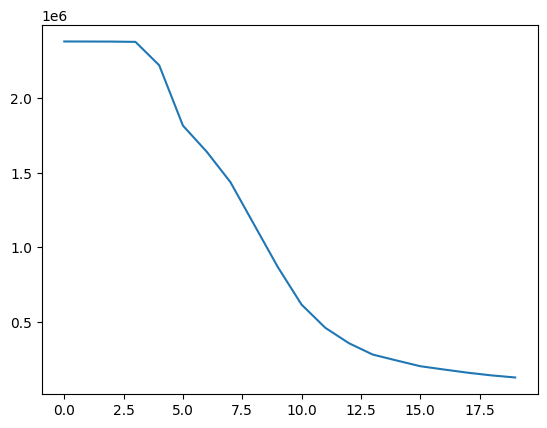

In [229]:
import matplotlib.pyplot as plt

loss_per_epoch = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [230]:
def postprocess(arr):
  arr = (arr*price_training_std) + price_training_mean
  return arr

In [231]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X).flatten()
  price_preds = postprocess(predictions)
  price_actuals = postprocess(y)
  df = pd.DataFrame(data={'Price Predictions': price_preds,
                          'Price Actuals':price_actuals,
                          })
  return df

In [232]:
post_processed_df = get_predictions_postprocessed(model1, X_test1, y_test1)
post_processed_df

3/3 [==============================] - 0s 7ms/step


,Price Predictions,Price Actuals
0,567509.2500,6.666707e+05
1,579658.2500,6.908972e+05
2,588159.6875,6.478576e+05
3,610679.0000,6.458474e+05
4,625840.8125,6.701077e+05
...,...,...
84,904928.4375,1.057819e+06
85,910755.1250,1.125106e+06
86,901870.6250,1.002237e+06
87,904189.2500,1.059745e+06


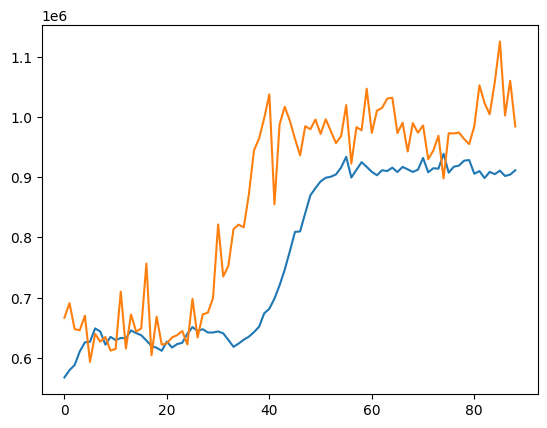

In [233]:
start, end = 0, 100
plt.plot(post_processed_df['Price Predictions'][start:end])
plt.plot(post_processed_df['Price Actuals'][start:end])

In [129]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

25/25 [==============================] - 0s 4ms/step


,Train Predictions,Actuals
0,1459.615601,2242.647059
1,1459.615601,2242.647059
2,1459.615601,2242.647059
3,1459.615601,2832.400000
4,1459.615601,2375.000000
...,...,...
795,1459.615601,926.461538
796,1459.615601,803.787234
797,1459.615601,824.212121
798,1459.615356,819.517857


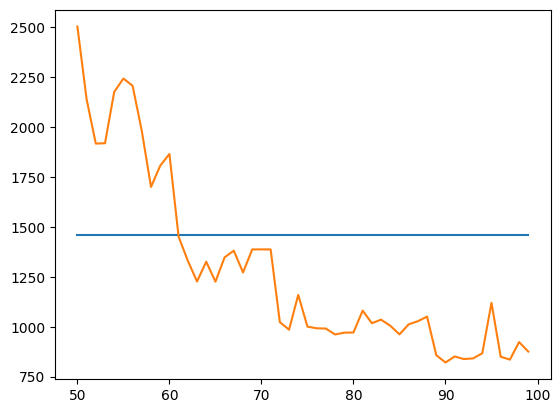

In [131]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])